## Import all packages and data

In [1]:
# Standard Packages
import pandas as pd
import numpy as np
import markdown

# Viz Packages
import seaborn as sns
import matplotlib.pyplot as plt

# Scipy Stats
import scipy.stats as stats 

# Statsmodel Api
import statsmodels.api as sm
from statsmodels.formula.api import ols

# SKLearn Modules
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures


# Suppress future and deprecation warnings
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
hd = pd.read_csv("/Users/eli/Desktop/Kings-County-Real-Estate-analysis-NAEG/data/kc_house_data.csv")
f = open('/Users/eli/Desktop/Kings-County-Real-Estate-analysis-NAEG/data/column_names.md', 'r')
desc=markdown.markdown( f.read() )
hd

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [3]:
hd.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [4]:
hd.loc[(hd['sqft_living'] / hd['sqft_lot']) <= .01]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
77,125079032,12/6/2021,1560000.0,4,3.0,3360,871200,2.0,NO,NO,...,PRIVATE,3360,0,950,350,2000,0,"35509 NE 91st Way, Carnation, Washington 98014...",47.679700,-121.86345
117,2023069067,10/29/2021,900000.0,3,2.0,1960,243936,1.5,NO,NO,...,PRIVATE,1960,0,480,0,1987,0,"21012 Southeast 159th Street, Renton, Washingt...",47.461450,-122.06005
274,7327700090,3/2/2022,2225000.0,4,3.5,3030,456073,1.0,YES,NO,...,PRIVATE,3030,0,600,600,1992,0,"21604 Southeast 358th Street, Auburn, Washingt...",47.280270,-122.05479
329,826079097,8/16/2021,800000.0,3,1.5,1870,218226,2.0,NO,NO,...,PRIVATE,1870,0,480,530,1986,0,"30512 Northeast 183rd Street, Duvall, Washingt...",47.759070,-121.93248
464,1424079002,1/14/2022,699000.0,3,1.5,1760,184408,2.0,NO,NO,...,PRIVATE,1760,0,0,0,1900,0,"35022 Southeast Fall City-Snoqualmie Road, Fal...",47.567840,-121.87266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29740,2421069039,1/18/2022,685000.0,3,2.0,1340,196020,1.0,NO,NO,...,PRIVATE,1340,0,530,240,1987,0,"34430 Enumclaw-Black Diamond Road Southeast, B...",47.293120,-121.99172
29835,422069034,7/30/2021,311000.0,1,1.0,640,155509,1.0,NO,NO,...,PRIVATE,640,0,0,180,1944,0,"19858 Maxwell Road Southeast, Maple Valley, Wa...",47.422970,-122.04092
29983,1421079010,7/6/2021,860000.0,3,2.0,1940,838965,2.0,NO,NO,...,PRIVATE,1940,1470,0,520,2001,0,"34125 Southeast 327th Place, Ravensdale, Washi...",47.303520,-121.89013
29985,3023039221,9/21/2021,450000.0,2,2.0,840,138520,1.0,NO,NO,...,PRIVATE,840,0,0,230,2020,0,"16097 109th Avenue Southwest, Vashon, Washingt...",47.458555,-122.47545


In [5]:
hd.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [6]:
# hd.drop(index = 14977, inplace = True)
# hd.describe()

In [7]:
hd["price"].describe()

count    3.015500e+04
mean     1.108536e+06
std      8.963857e+05
min      2.736000e+04
25%      6.480000e+05
50%      8.600000e+05
75%      1.300000e+06
max      3.075000e+07
Name: price, dtype: float64

In [8]:
hd["grade"]

0        7 Average
1        7 Average
2        7 Average
3         9 Better
4        7 Average
           ...    
30150       8 Good
30151    7 Average
30152    7 Average
30153       8 Good
30154    7 Average
Name: grade, Length: 30155, dtype: object

In [9]:
#add zip column for zipcodes
hd["zip"] = hd.address.str[-20:-15]

#remove data that is outside of King County
zips=[98052,98115,98103,98092,98042,98023,98105,98003,98034,98118,98133,98058,98125,98031,98122,98033,98006,98032,98030,98004,98001,98059,98117,98056,98198,98168,98155,98027,98109,98002,98038,98144,98146,98074,98119,98007,98040,98029,98107,98011,98108,98072,98106,98178,98116,98112,98008,98053,98028,98126,98188,98102,98055,98075,98177,98022,98166,98199,98005,98121,98136,98045,98057,98019,98104,98077,98101,98065,98148,98070,98014,98354,98024,98051,98010,98047,98251,98134,98039,98195,98158,98068,98256,98288,98050,98132,98171,98184,98054,98009,98013,98015,98025,98035,98041,98062,98064,98063,98071,98073,98083,98089,98093,98111,98113,98114,98124,98127,98131,98129,98139,98138,98141,98145,98151,98154,98160,98164,98161,98165,98170,98174,98175,98181,98185,98190,98194,98191,98224,98471,98481]
zips_strings = [str(i) for i in zips]
zips = zips_strings
non_wa_zips = hd.loc[~hd["zip"].isin(zips)]
hd.drop(index = non_wa_zips.index, inplace = True, axis = 0)

#convert zip category to integers
hd["zip"] = hd["zip"].astype(int)

#remove duplicate rows
hd = hd.drop_duplicates(subset=["id"])

# find and drop sales records with no bedrooms or no bathrooms
nobed_nobath = hd.loc[(hd['bedrooms'] == 0) | (hd['bathrooms'] == 0)]
hd.drop(index = nobed_nobath.index, inplace = True, axis = 0)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
#remove id column
hd = hd.drop(columns=["id"])

#add columns for year sold and years old
hd["years_old"] = 2023-hd["yr_built"]

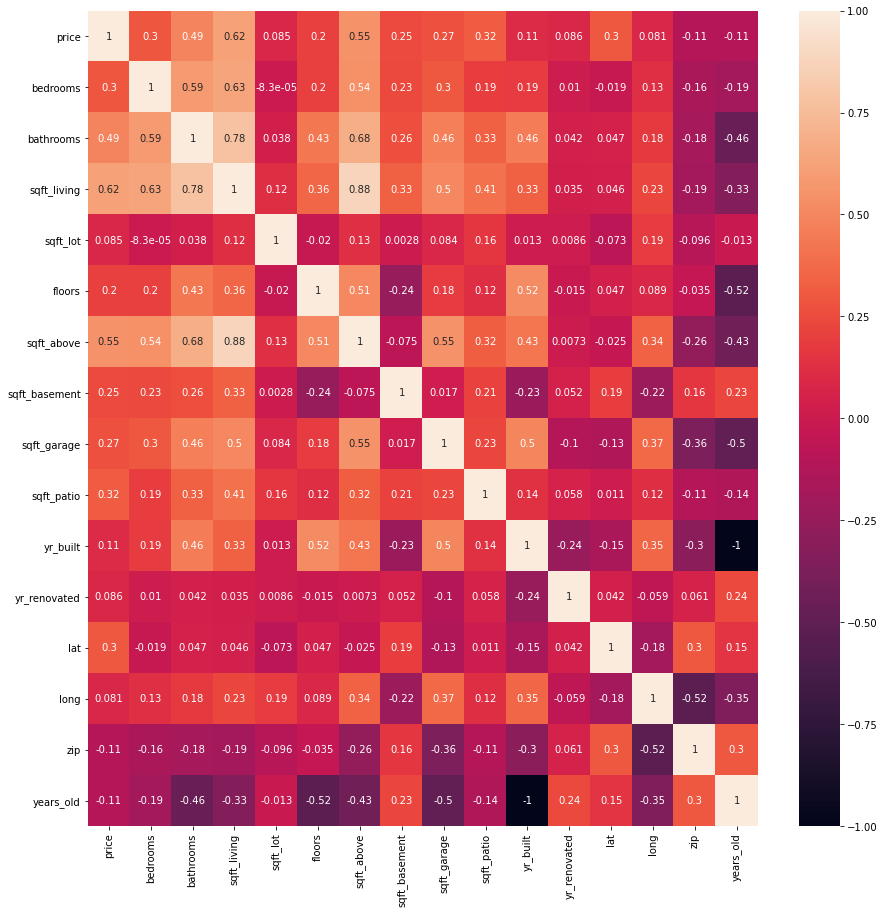

In [11]:
#plot the heatmap to determine correlations
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(hd.corr(), annot=True);

In [12]:
#list correlations
price_corrs = hd.corr()['price'].map(abs).sort_values(ascending=False)
price_corrs

price            1.000000
sqft_living      0.620002
sqft_above       0.548982
bathrooms        0.491500
sqft_patio       0.318562
lat              0.298897
bedrooms         0.295287
sqft_garage      0.269071
sqft_basement    0.247261
floors           0.201785
years_old        0.107101
yr_built         0.107101
zip              0.106383
yr_renovated     0.085966
sqft_lot         0.084927
long             0.081069
Name: price, dtype: float64

## Simple Linear Regression - Baseline Model with Train-Test Split

In [13]:
# define variables for simple linear regression
y = hd['price']
X = hd.drop('price', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# double check train-test split 
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

# We always should have the same number of rows in X as values in y
assert X_train.shape[0] == y_train.shape[0]

X_train is a DataFrame with 21873 rows and 25 columns
y_train is a Series with 21873 values


In [14]:
# select our best correlated predictor, as our X Train
baseline_X_train = X_train[['sqft_living']]

# Do the same for X Test
baseline_X_test = X_test[['sqft_living']]

# instantiate the baseline model
baseline_model = LinearRegression()

# Fit our model
baseline_model.fit(baseline_X_train, y_train)

# Get our R2 score
print('Base Training R2:', round(baseline_model.score(baseline_X_train, y_train), 4))
print('Base Test R2:', round(baseline_model.score(baseline_X_test, y_test), 4))
print()

# set up a validation model 
splitter = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=baseline_X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Validation Checks")
print("Baseline Model Train score:", round(baseline_scores["train_score"].mean(), 4))
print("Baseline Model Validation score:", round(baseline_scores["test_score"].mean(), 4))
print()

# Calculate predictions on training and test sets
train_preds = baseline_model.predict(baseline_X_train)
test_preds = baseline_model.predict(baseline_X_test)

# Calculate training and test MSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
print('Train Root Mean Squared Error:', train_rmse)
print('Test Root Mean Squared Error:', test_rmse)
print('Difference in RMSE for Test/Train:', abs(round(test_rmse - train_rmse, 2)))

Base Training R2: 0.3878
Base Test R2: 0.3728

Validation Checks
Baseline Model Train score: 0.3755
Baseline Model Validation score: 0.4267

Train Root Mean Squared Error: 707035.2253083049
Test Root Mean Squared Error: 680256.0380789591
Difference in RMSE for Test/Train: 26779.19


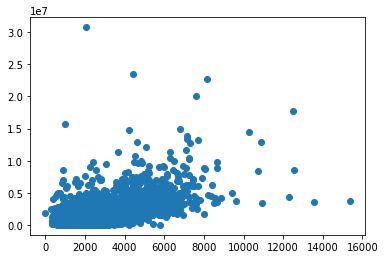

In [15]:
plt.scatter(x=hd["sqft_living"], y=hd["price"]);

## Polynomial Model

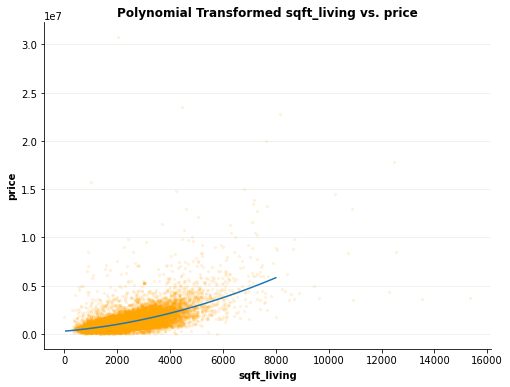

In [16]:
# fit and transform the X_train sqft_living column to a poly of 2
poly2 = PolynomialFeatures(2)
poly_sqft = poly2.fit_transform(X_train[['sqft_living']])

# instantiate a PolynomialFeatures and fit/transfrom to X_poly
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(baseline_X_train)

# fit X_poly to Linear Regression model 
reg_poly = LinearRegression().fit(X_poly, y_train)

# create line parameters 
X_linspace = pd.DataFrame(np.linspace(50, 8000, 50), columns= ['sqft_living'])

# create poly line X and Y values
X_linspace_fin = poly.fit_transform(X_linspace)
y_poly_pred = reg_poly.predict(X_linspace_fin)

# set up fig
fig, ax = plt.subplots(figsize=(8, 6))

# plot polynomial regression line against the data
plt.scatter(hd['sqft_living'], hd['price'], 
            s = 5, alpha = 0.1, 
            color='orange')

plt.plot(X_linspace, y_poly_pred)
plt.xlabel('sqft_living', weight = 'bold')
plt.ylabel('price', weight = 'bold')
ax.set_title('Polynomial Transformed sqft_living vs. price', weight = 'bold');

# removes top and right side axis
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# set gridline visibility
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

plt.show();

In [17]:
# instantiate a poly baseline model
poly_baseline_model = LinearRegression()

# Fit our poly model
poly_baseline_model.fit(X_poly, y_train)

print('Polynomial Base Training R2:', round(poly_baseline_model.score(X_poly, y_train), 4))

Polynomial Base Training R2: 0.4125


## Add School Data

In [18]:
#Import school data
new_school = pd.read_csv("/Users/eli/Desktop/Kings-County-Real-Estate-analysis-NAEG/Nadya/data/New School Data - Sheet1.csv")

#Clean up school data
schoolnames = new_school.loc[new_school["Name"].str.contains("miles")]
schoolnames["id"]=range(1, len(schoolnames) + 1)
schoolloc = new_school.loc[new_school["Name"].str.contains("WA")]
schoolloc["id"]=range(1, len(schoolloc) + 1)
schoolloc=schoolloc.rename(columns={"Name": "Location"})
students = new_school.loc[new_school["Name"].str.contains("Students")]
students["id"]=range(1, len(students) + 1)
students=students.rename(columns={"Name": "student count"})

#Relabel grades for schools
grade = new_school.loc[new_school["Name"].str.contains("Grade")]
grade["id"]=range(1, len(grade) + 1)
grade=grade.rename(columns={"Name": "grades"})
grade.grades = grade.grades.apply(lambda x: "middle" if "Middle" in x else x)
grade.grades = grade.grades.apply(lambda x: "elementary" if "Primary" in x else x)
grade.grades = grade.grades.apply(lambda x: "high" if "High" in x else x)
grade.grades = grade.grades.apply(lambda x: "kindergarten" if "Kindergarten" in x else x)
grade.grades = grade.grades.apply(lambda x: "prek" if "Prekindergarten" in x else x)
grade.grades = grade.grades.apply(lambda x: "special education" if "Special" in x else x)
grade.grades = grade.grades.apply(lambda x: "middle" if "Regular School Grade: Grade 6 to Grade 8" in x else x)
grade.grades = grade.grades.apply(lambda x: "other" if "Other" in x else x)

#concat dataframes
waschools = pd.concat([schoolnames.set_index('id'),schoolloc.set_index('id'), grade.set_index('id'), students.set_index('id')], axis=1, join='inner')

<ipython-input-18-145d94092efa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schoolnames["id"]=range(1, len(schoolnames) + 1)
<ipython-input-18-145d94092efa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schoolloc["id"]=range(1, len(schoolloc) + 1)
<ipython-input-18-145d94092efa>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [19]:
#Create zipcode and student population columns
waschools["zip"] = waschools["Location"].str[-6:]
waschools[["student count", "count"]] = waschools["student count"].str.split(":", expand=True)
waschools=waschools.drop(columns=["student count", "Location"])

#Relabel performance column with ordinal values
waschools["performance"] = 0
waschools["performance"].iloc[0:111] = 5
waschools["performance"].iloc[112:214] = 4
waschools["performance"].iloc[214:287] = 3
waschools["performance"].iloc[287:337] = 2
waschools["performance"].iloc[337:395] = 1

#Make new dataframe for all schools ranked at 1 or more for performance
newwaschools = waschools.loc[waschools["performance"]!=0]

#Make new dataframe that shows average performance rating by zipcode
schoolavg = newwaschools.groupby("zip").mean("performance").reset_index().sort_values(by="performance", ascending = False)
schoolavg["zip"]=schoolavg["zip"].astype(int)


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [20]:
prices = hd[["price", "zip"]].groupby(by=["zip"]).mean().sort_values(by="price", ascending=False).reset_index()
prices["zip"]=prices["zip"].astype(int)

In [21]:
schools_and_prices = pd.merge(prices, schoolavg, on = ["zip"]).sort_values(by=["performance"], ascending=False)

In [22]:
schools_and_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 62
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   zip          72 non-null     int64  
 1   price        72 non-null     float64
 2   performance  72 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 2.2 KB


In [23]:
schools_dict = dict(zip(schools_and_prices.zip, round(schools_and_prices.performance, 2)))
schools_dict

{98039: 5.0,
 98074: 5.0,
 98105: 5.0,
 98024: 5.0,
 98029: 5.0,
 98102: 5.0,
 98004: 5.0,
 98075: 5.0,
 98040: 5.0,
 98072: 4.8,
 98077: 4.8,
 98053: 4.75,
 98065: 4.75,
 98006: 4.75,
 98115: 4.71,
 98070: 4.67,
 98112: 4.67,
 98199: 4.5,
 98119: 4.5,
 98052: 4.5,
 98109: 4.5,
 98177: 4.5,
 98038: 4.5,
 98027: 4.4,
 98028: 4.4,
 98019: 4.33,
 98045: 4.33,
 98117: 4.33,
 98011: 4.33,
 98033: 4.25,
 98008: 4.12,
 98014: 4.0,
 98010: 4.0,
 98155: 4.0,
 98059: 4.0,
 98034: 4.0,
 98107: 4.0,
 98005: 4.0,
 98116: 3.8,
 98103: 3.75,
 98133: 3.71,
 98007: 3.5,
 98092: 3.3,
 98022: 3.29,
 98001: 3.22,
 98042: 3.14,
 98058: 3.1,
 98056: 3.0,
 98003: 3.0,
 98047: 3.0,
 98023: 2.92,
 98144: 2.83,
 98108: 2.57,
 98125: 2.5,
 98002: 2.33,
 98198: 2.29,
 98031: 2.27,
 98166: 2.25,
 98106: 2.0,
 98136: 2.0,
 98354: 2.0,
 98148: 2.0,
 98030: 1.86,
 98032: 1.8,
 98122: 1.75,
 98055: 1.67,
 98146: 1.5,
 98118: 1.5,
 98178: 1.25,
 98168: 1.22,
 98126: 1.2,
 98188: 1.0}

In [24]:
X_train['avg_school_quality'] = X_train['zip'].map(schools_dict)

<ipython-input-24-a4b485f5a02c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['avg_school_quality'] = X_train['zip'].map(schools_dict)


In [25]:
X_train

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip,years_old,avg_school_quality
8411,3/10/2022,3,2.5,1300,825,2.0,NO,NO,NO,NONE,...,0,0,2008,0,"1127A 18th Ave, Seattle, Washington 98122, Uni...",47.611760,-122.309000,98122,15,1.75
20884,7/26/2021,4,3.5,3180,8480,2.0,NO,NO,YES,NONE,...,480,240,1977,0,"5124 107th Avenue Northeast, Kirkland, Washing...",47.654335,-122.196871,98033,46,4.25
11917,4/27/2022,3,2.0,1770,7544,1.0,NO,NO,NO,NONE,...,400,80,1977,0,"8902 Northeast 144th Street, Kirkland, Washing...",47.731640,-122.221600,98034,46,4.00
12517,1/3/2022,5,3.5,2690,7200,2.0,NO,NO,NO,GOOD,...,510,400,1978,0,"14508 37th Avenue Northeast, Lake Forest Park,...",47.734060,-122.288075,98155,45,4.00
14026,5/11/2022,5,3.0,3670,13794,1.0,NO,NO,NO,FAIR,...,500,1120,1972,0,"14236 Westwood Place Northeast, Seattle, Washi...",47.731990,-122.286080,98125,51,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22318,1/22/2022,3,2.5,1950,7210,2.0,NO,NO,NO,NONE,...,440,110,1979,0,"5206 South 302nd Place, Auburn, Washington 980...",47.331160,-122.269130,98001,44,3.22
5554,5/18/2022,4,2.5,2170,6408,1.0,NO,NO,NO,NONE,...,490,170,1981,0,"14008 81st Avenue Northeast, Kirkland, Washing...",47.726310,-122.233155,98034,42,4.00
883,4/25/2022,3,2.5,1740,4277,2.0,NO,NO,NO,NONE,...,440,20,1992,0,"25760 Southeast 35th Place, Sammamish, Washing...",47.577610,-121.995820,98029,31,5.00
16320,5/25/2022,3,2.5,3580,8500,1.0,NO,NO,NO,AVERAGE,...,430,380,1928,2008,"3817 Southwest Myrtle Street, Seattle, Washing...",47.539460,-122.381255,98126,95,1.20


In [26]:
scale_mapper1 = {"NONE":0, "FAIR": 1, "AVERAGE":2, "GOOD":3, "EXCELLENT":4}
X_train["view"] = X_train["view"].replace(scale_mapper1)

scale_mapper2 = {"Poor":0, "Fair": 1, "Average":2, "Good":3, "Very Good":4}
X_train["condition"] = X_train["condition"].replace(scale_mapper2)

scale_mapper3 = {"1 Cabin":1, "2 Substandard": 2, "3 Poor":3, "4 Low":4, "5 Fair":5, 
               "6 Low Average":6, "7 Average": 7, "8 Good":8, "9 Better":9, "10 Very Good":10,
               "11 Excellent": 11, "12 Luxury":12, "13 Mansion":13 }
X_train["grade"] = X_train["grade"].replace(scale_mapper3)

<ipython-input-26-7dad008bcee4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["view"] = X_train["view"].replace(scale_mapper1)
<ipython-input-26-7dad008bcee4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["condition"] = X_train["condition"].replace(scale_mapper2)
<ipython-input-26-7dad008bcee4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [27]:
X_train = pd.get_dummies(X_train, columns = ['waterfront', 'greenbelt', 'nuisance'], drop_first = True)

In [28]:
X_train = X_train.drop(columns=["heat_source", "sewer_system", "address", "lat", "long"])

In [29]:
X_train.loc[X_train['avg_school_quality'].isna()] = X_train['avg_school_quality'].mean()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21873 entries, 8411 to 24469
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                21873 non-null  object 
 1   bedrooms            21873 non-null  float64
 2   bathrooms           21873 non-null  float64
 3   sqft_living         21873 non-null  float64
 4   sqft_lot            21873 non-null  float64
 5   floors              21873 non-null  float64
 6   view                21873 non-null  float64
 7   condition           21873 non-null  float64
 8   grade               21873 non-null  float64
 9   sqft_above          21873 non-null  float64
 10  sqft_basement       21873 non-null  float64
 11  sqft_garage         21873 non-null  float64
 12  sqft_patio          21873 non-null  float64
 13  yr_built            21873 non-null  float64
 14  yr_renovated        21873 non-null  float64
 15  zip                 21873 non-null  float64
 16  y

# All Variable Model

In [30]:
all_variable_X = X_train
all_variable_X = all_variable_X.drop(columns=["date"])

In [31]:
all_variable_model = sm.OLS(y_train, sm.add_constant(all_variable_X)).fit()
all_variable_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     1244.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:10:40   Log-Likelihood:            -3.2270e+05
No. Observations:               21873   AIC:                         6.454e+05
Df Residuals:                   21852   BIC:                         6.456e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -4.065e+06   1.78e+05    -22.785      0.000   -4.41e+06   -3.72e+06
bedrooms           -9.009e+04   5925.460    -15.204      0.000   -1.02e+05   -7.85e+04
bathrooms           9.583e+04   8632.091     11.102      0.000    7.89e+04    1.13e+05
sqft_living          160.5935     19.692      8.155      0.000     121.995     199.192
sqft_lot              -0.1391      0.072     -1.940      0.052      -0.280       0.001
floors             -1.004e+05    1.1e+04     -9.118      0.000   -1.22e+05   -7.88e+04
view                7.883e+04   5846.260     13.484      0.000    6.74e+04    9.03e+04
condition           2.596e+04   6667.610      3.894      0.000    1.29e+04     3.9e+04
grade               2.258e+05   6333.390     35.654      0.000    2.13e+05    2.38e+05
sqft_above           243.8348     19.971     12.209      0.000     204.690     282.980
sqft_basement        118.7927     14.745      8.056      0.000      89.891     147.694
sqft_garage         -225.2351     21.083    -10.683      0.000    -266.559    -183.911
sqft_patio            89.4166     19.624      4.556      0.000      50.952     127.881
yr_built           -7876.9380   4478.867     -1.759      0.079   -1.67e+04     901.966
yr_renovated          18.5909     10.747      1.730      0.084      -2.474      39.656
zip                  183.7998     92.144      1.995      0.046       3.191     364.408
years_old          -4081.3815   4528.173     -0.901      0.367    -1.3e+04    4794.166
avg_school_quality  1.454e+05   4147.251     35.061      0.000    1.37e+05    1.54e+05
waterfront_YES      9.517e+05   3.59e+04     26.541      0.000    8.81e+05    1.02e+06
greenbelt_YES      -5027.0053   2.66e+04     -0.189      0.850   -5.71e+04    4.71e+04
nuisance_YES        4.687e+04   1.14e+04      4.111      0.000    2.45e+04    6.92e+04
==============================================================================
Omnibus:                    34584.839   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         76194570.270
Skew:                           9.675   Prob(JB):                         0.00
Kurtosis:                     291.495   Cond. No.                     4.32e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#add requirements for our stakeholder
hd = hd.loc[(hd["bedrooms"] > 1) & (hd["bedrooms"]<=5)]
hd = hd.loc[hd["price"]<=1300000]
hd = hd.drop(columns=["date"])

# Recursive Feature Elimination Model

In [32]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select = 5)

In [33]:
select.fit(X = all_variable_X, y = y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [34]:
select.ranking_

array([ 7,  1,  9, 16,  1,  3,  8,  1, 12, 13, 10, 14,  6, 15, 11,  5,  2,
        1,  1,  4])

In [35]:
all_variable_X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_garage',
       'sqft_patio', 'yr_built', 'yr_renovated', 'zip', 'years_old',
       'avg_school_quality', 'waterfront_YES', 'greenbelt_YES',
       'nuisance_YES'],
      dtype='object')

In [36]:
pd.DataFrame(data=select.ranking_, index=all_variable_X.columns)

,0
bedrooms,7
bathrooms,1
sqft_living,9
sqft_lot,16
floors,1
view,3
condition,8
grade,1
sqft_above,12
sqft_basement,13


In [37]:
rfe_X = all_variable_X[['bathrooms', 'floors', 'grade', 'avg_school_quality', 'greenbelt_YES', 'waterfront_YES']]
all_variable_model = sm.OLS(y_train, sm.add_constant(rfe_X)).fit()
all_variable_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     2843.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:10:41   Log-Likelihood:            -3.2470e+05
No. Observations:               21873   AIC:                         6.494e+05
Df Residuals:                   21866   BIC:                         6.495e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.342e+06   3.23e+04    -72.566      0.000   -2.41e+06   -2.28e+06
bathrooms           1.991e+05   6915.129     28.792      0.000    1.86e+05    2.13e+05
floors             -2.216e+05   9624.158    -23.029      0.000   -2.41e+05   -2.03e+05
grade               3.613e+05   5487.939     65.830      0.000    3.51e+05    3.72e+05
avg_school_quality  1.583e+05   4296.918     36.836      0.000     1.5e+05    1.67e+05
greenbelt_YES      -3.975e+05   2.32e+04    -17.165      0.000   -4.43e+05   -3.52e+05
waterfront_YES      8.659e+05   2.43e+04     35.693      0.000    8.18e+05    9.13e+05
==============================================================================
Omnibus:                    33035.115   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47740294.062
Skew:                           8.925   Prob(JB):                         0.00
Kurtosis:                     231.176   Cond. No.                         66.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Log Transformation

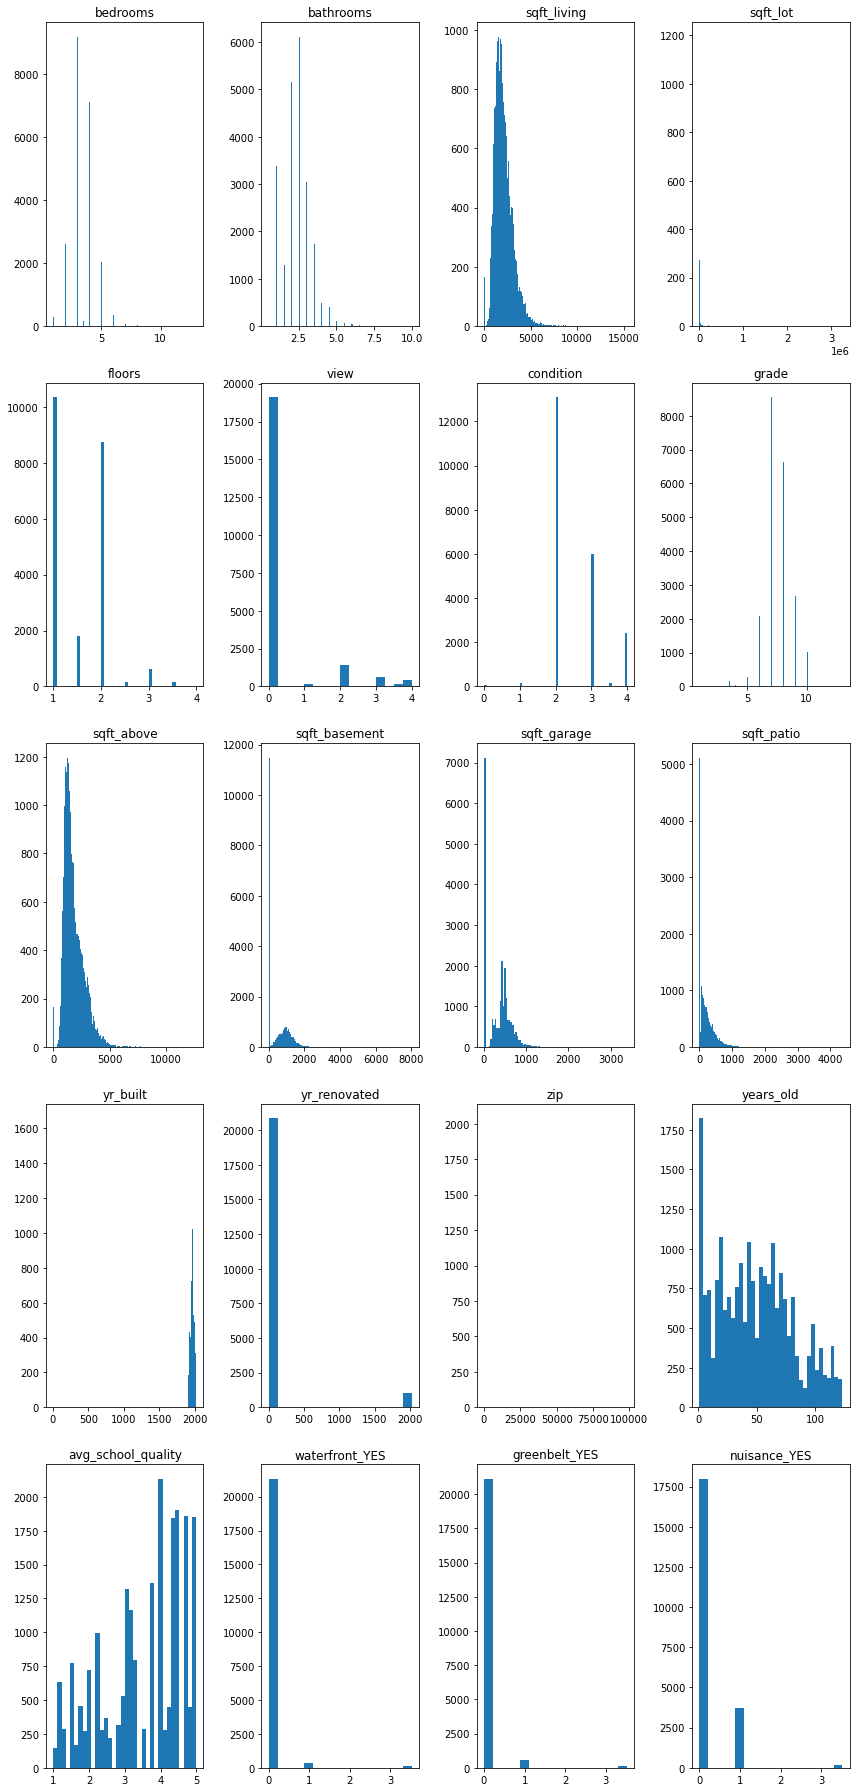

In [38]:
# set up figure for predictor variables in all_variable_X
fig, axes = plt.subplots(nrows=(all_variable_X.shape[1] // 4), ncols=4, figsize=(12,25))

# for each col in X_third, plot distribution
for col, ax in zip(all_variable_X, axes.flatten()):
    ax.hist(all_variable_X[col], bins='auto')
    ax.set_title(col)
    
fig.tight_layout()

In [39]:
#selecting variables for log
log_variables = ['sqft_living','sqft_above', 'years_old']

# assign to X_cont
X_logs = all_variable_X[log_variables]

In [40]:
X_logs

,sqft_living,sqft_above,years_old
8411,1300.0,880.0,15.0
20884,3180.0,3180.0,46.0
11917,1770.0,1290.0,46.0
12517,2690.0,1720.0,45.0
14026,3670.0,2010.0,51.0
...,...,...,...
22318,1950.0,1950.0,44.0
5554,2170.0,1440.0,42.0
883,1740.0,1740.0,31.0
16320,3580.0,2000.0,95.0


In [41]:
X_logs.describe()

,sqft_living,sqft_above,years_old
count,21873.000000,21873.000000,21873.000000
mean,2119.433592,1817.314358,48.762308
std,994.054798,894.598960,31.717528
min,3.000000,2.000000,1.000000
25%,1430.000000,1190.000000,22.000000
50%,1940.000000,1570.000000,46.000000
75%,2630.000000,2290.000000,70.000000
max,15360.000000,12660.000000,123.000000


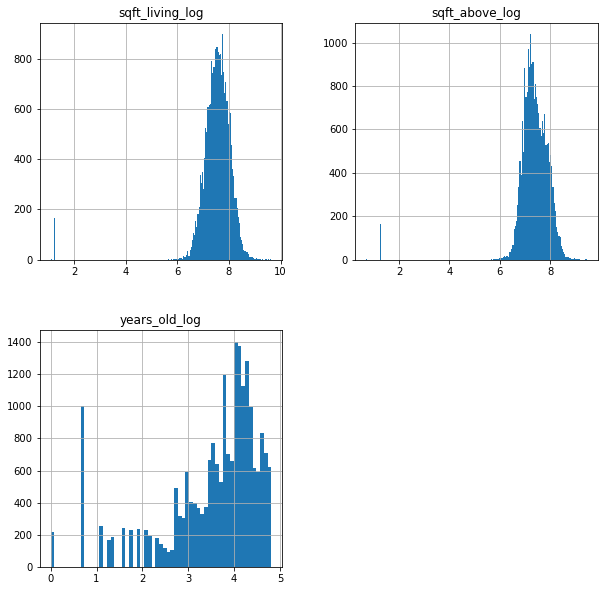

In [42]:
#log transformation
log_columns = [f'{column}_log' for column in X_logs.columns]
cont_log = np.log(X_logs)
cont_log.columns = log_columns
cont_log.hist(figsize=(10, 10), bins='auto')
fig.tight_layout();

In [43]:
cont_log

,sqft_living_log,sqft_above_log,years_old_log
8411,7.170120,6.779922,2.708050
20884,8.064636,8.064636,3.828641
11917,7.478735,7.162397,3.828641
12517,7.897296,7.450080,3.806662
14026,8.207947,7.605890,3.931826
...,...,...,...
22318,7.575585,7.575585,3.784190
5554,7.682482,7.272398,3.737670
883,7.461640,7.461640,3.433987
16320,8.183118,7.600902,4.553877


In [44]:
log_transformed = cont_log.join(all_variable_X).drop(columns = ["sqft_living", "sqft_above", "sqft_lot", 'years_old',
                                                                "yr_renovated", "yr_built", "sqft_basement", 
                                                                "sqft_garage", "sqft_patio"])
log_transformed

,sqft_living_log,sqft_above_log,years_old_log,bedrooms,bathrooms,floors,view,condition,grade,zip,avg_school_quality,waterfront_YES,greenbelt_YES,nuisance_YES
8411,7.170120,6.779922,2.708050,3.0,2.5,2.0,0.0,2.0,8.0,98122.0,1.75,0.0,0.0,0.0
20884,8.064636,8.064636,3.828641,4.0,3.5,2.0,0.0,3.0,8.0,98033.0,4.25,0.0,0.0,1.0
11917,7.478735,7.162397,3.828641,3.0,2.0,1.0,0.0,2.0,8.0,98034.0,4.00,0.0,0.0,0.0
12517,7.897296,7.450080,3.806662,5.0,3.5,2.0,3.0,2.0,9.0,98155.0,4.00,0.0,0.0,0.0
14026,8.207947,7.605890,3.931826,5.0,3.0,1.0,1.0,2.0,9.0,98125.0,2.50,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22318,7.575585,7.575585,3.784190,3.0,2.5,2.0,0.0,3.0,7.0,98001.0,3.22,0.0,0.0,0.0
5554,7.682482,7.272398,3.737670,4.0,2.5,1.0,0.0,2.0,8.0,98034.0,4.00,0.0,0.0,0.0
883,7.461640,7.461640,3.433987,3.0,2.5,2.0,0.0,3.0,8.0,98029.0,5.00,0.0,0.0,0.0
16320,8.183118,7.600902,4.553877,3.0,2.5,1.0,2.0,2.0,8.0,98126.0,1.20,0.0,0.0,0.0


In [45]:
log_y = np.log(y_train)

In [46]:
log_model = sm.OLS(log_y, sm.add_constant(log_transformed)).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     1958.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:11:06   Log-Likelihood:                -10367.
No. Observations:               21873   AIC:                         2.076e+04
Df Residuals:                   21858   BIC:                         2.088e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 10.0833      0.108     93.303      0.000       9.871      10.295
sqft_living_log        0.3173      0.017     19.167      0.000       0.285       0.350
sqft_above_log        -0.0815      0.014     -5.852      0.000      -0.109      -0.054
years_old_log          0.0658      0.003     19.547      0.000       0.059       0.072
bedrooms              -0.0014      0.004     -0.349      0.727      -0.009       0.006
bathrooms              0.0705      0.005     13.716      0.000       0.060       0.081
floors                 0.0318      0.007      4.675      0.000       0.018       0.045
view                   0.0706      0.004     19.695      0.000       0.064       0.078
condition              0.0332      0.004      8.219      0.000       0.025       0.041
grade                  0.1733      0.004     46.046      0.000       0.166       0.181
zip                -5.702e-06   1.34e-06     -4.270      0.000   -8.32e-06   -3.08e-06
avg_school_quality     0.1530      0.002     61.410      0.000       0.148       0.158
waterfront_YES         0.2269      0.022     10.112      0.000       0.183       0.271
greenbelt_YES          0.0415      0.017      2.494      0.013       0.009       0.074
nuisance_YES           0.0296      0.007      4.161      0.000       0.016       0.044
==============================================================================
Omnibus:                     6516.760   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            89684.963
Skew:                          -1.048   Prob(JB):                         0.00
Kurtosis:                      12.696   Cond. No.                     4.08e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## One Hot Encode Zip Codes

In [47]:
log_transformed_zips = pd.get_dummies(log_transformed, columns = ['zip'], drop_first = True)
log_transformed_zips.columns

Index(['sqft_living_log', 'sqft_above_log', 'years_old_log', 'bedrooms',
       'bathrooms', 'floors', 'view', 'condition', 'grade',
       'avg_school_quality', 'waterfront_YES', 'greenbelt_YES', 'nuisance_YES',
       'zip_98001.0', 'zip_98002.0', 'zip_98003.0', 'zip_98004.0',
       'zip_98005.0', 'zip_98006.0', 'zip_98007.0', 'zip_98008.0',
       'zip_98010.0', 'zip_98011.0', 'zip_98014.0', 'zip_98019.0',
       'zip_98022.0', 'zip_98023.0', 'zip_98024.0', 'zip_98027.0',
       'zip_98028.0', 'zip_98029.0', 'zip_98030.0', 'zip_98031.0',
       'zip_98032.0', 'zip_98033.0', 'zip_98034.0', 'zip_98038.0',
       'zip_98039.0', 'zip_98040.0', 'zip_98042.0', 'zip_98045.0',
       'zip_98047.0', 'zip_98052.0', 'zip_98053.0', 'zip_98055.0',
       'zip_98056.0', 'zip_98058.0', 'zip_98059.0', 'zip_98065.0',
       'zip_98070.0', 'zip_98072.0', 'zip_98074.0', 'zip_98075.0',
       'zip_98077.0', 'zip_98092.0', 'zip_98102.0', 'zip_98103.0',
       'zip_98105.0', 'zip_98106.0', 'zip_98107.0'

In [48]:
log_zips_model = sm.OLS(log_y, sm.add_constant(log_transformed_zips)).fit()
log_zips_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     623.7
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:11:07   Log-Likelihood:                -5858.8
No. Observations:               21873   AIC:                         1.189e+04
Df Residuals:                   21788   BIC:                         1.257e+04
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  9.2988      0.083    112.649      0.000       9.137       9.461
sqft_living_log        0.2112      0.014     15.401      0.000       0.184       0.238
sqft_above_log         0.2405      0.013     18.965      0.000       0.216       0.265
years_old_log         -0.0023      0.003     -0.780      0.435      -0.008       0.004
bedrooms              -0.0016      0.003     -0.514      0.607      -0.008       0.005
bathrooms              0.0479      0.004     11.340      0.000       0.040       0.056
floors                -0.0703      0.006    -11.288      0.000      -0.083      -0.058
view                   0.0688      0.003     22.797      0.000       0.063       0.075
condition              0.0577      0.003     17.198      0.000       0.051       0.064
grade                  0.0941      0.003     28.748      0.000       0.088       0.101
avg_school_quality     0.4659      0.003    145.884      0.000       0.460       0.472
waterfront_YES         0.3170      0.019     17.023      0.000       0.280       0.353
greenbelt_YES          0.0587      0.014      4.199      0.000       0.031       0.086
nuisance_YES          -0.0385      0.006     -6.495      0.000      -0.050      -0.027
zip_98001.0           -1.7492      0.110    -15.881      0.000      -1.965      -1.533
zip_98002.0           -1.4089      0.109    -12.886      0.000      -1.623      -1.195
zip_98003.0           -1.6937      0.110    -15.397      0.000      -1.909      -1.478
zip_98004.0           -1.3015      0.113    -11.520      0.000      -1.523      -1.080
zip_98005.0           -1.1894      0.114    -10.453      0.000      -1.412      -0.966
zip_98006.0           -1.6976      0.111    -15.280      0.000      -1.915      -1.480
zip_98007.0           -1.1509      0.113    -10.197      0.000      -1.372      -0.930
zip_98008.0           -1.3980      0.111    -12.581      0.000      -1.616      -1.180
zip_98010.0           -1.9972      0.112    -17.836      0.000      -2.217      -1.778
zip_98011.0           -1.6700      0.113    -14.763      0.000      -1.892      -1.448
zip_98014.0           -1.7824      0.114    -15.632      0.000      -2.006      -1.559
zip_98019.0           -1.8843      0.113    -16.671      0.000      -2.106      -1.663
zip_98022.0           -1.7628      0.111    -15.872      0.000      -1.981      -1.545
zip_98023.0           -1.6462      0.109    -15.048      0.000      -1.861      -1.432
zip_98024.0           -2.0321      0.117    -17.438      0.000      -2.261      -1.804
zip_98027.0           -1.7368      0.111    -15.610      0.000      -1.955      -1.519
zip_98028.0           -1.8218      0.112    -16.216      0.000      -2.042      -1.602
zip_98029.0           -1.8925      0.113    -16.804      0.000      -2.113      -1.672
zip_98030.0           -1.1051      0.1

In [49]:
zips_ohe = pd.get_dummies(log_transformed['zip'], drop_first = True)
zips_school = zips_ohe.mul(log_transformed_zips['avg_school_quality'], axis = 0)

In [50]:
zips_school_interaction = pd.merge(zips_school, 
                                   log_transformed_zips[['sqft_living_log', 'sqft_above_log',
                                                         'years_old_log', 'bathrooms',
                                                         'bedrooms', 'floors', 'view',
                                                         'condition', 'grade','waterfront_YES',
                                                         'greenbelt_YES', 'nuisance_YES']], 
                                   how = 'inner', left_on = zips_school.index, right_on = log_transformed_zips.index)
#zips_school_interaction
zips_school_interaction=zips_school_interaction.rename(columns={'key_0': 'index'})

# zips_school_interaction.rename(index={'key_0': 'index'})
zips_school_interaction.set_index('index', inplace = True)

In [51]:
zips_school_interaction

,98001.0,98002.0,98003.0,98004.0,98005.0,98006.0,98007.0,98008.0,98010.0,98011.0,...,years_old_log,bathrooms,bedrooms,floors,view,condition,grade,waterfront_YES,greenbelt_YES,nuisance_YES
index,,,,,,,,,,,,,,,,,,,,,
8411,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,2.708050,2.5,3.0,2.0,0.0,2.0,8.0,0.0,0.0,0.0
20884,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,3.828641,3.5,4.0,2.0,0.0,3.0,8.0,0.0,0.0,1.0
11917,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,3.828641,2.0,3.0,1.0,0.0,2.0,8.0,0.0,0.0,0.0
12517,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,3.806662,3.5,5.0,2.0,3.0,2.0,9.0,0.0,0.0,0.0
14026,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,3.931826,3.0,5.0,1.0,1.0,2.0,9.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22318,3.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,3.784190,2.5,3.0,2.0,0.0,3.0,7.0,0.0,0.0,0.0
5554,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,3.737670,2.5,4.0,1.0,0.0,2.0,8.0,0.0,0.0,0.0
883,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,3.433987,2.5,3.0,2.0,0.0,3.0,8.0,0.0,0.0,0.0


In [52]:
interaction_model = sm.OLS(log_y, sm.add_constant(zips_school_interaction)).fit()
interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     623.7
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:11:07   Log-Likelihood:                -5858.8
No. Observations:               21873   AIC:                         1.189e+04
Df Residuals:                   21788   BIC:                         1.257e+04
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              10.9419      0.090    122.071      0.000      10.766      11.118
98001.0            -0.5876      0.034    -17.122      0.000      -0.655      -0.520
98002.0            -0.8440      0.048    -17.750      0.000      -0.937      -0.751
98003.0            -0.6464      0.037    -17.527      0.000      -0.719      -0.574
98004.0            -0.1231      0.022     -5.531      0.000      -0.167      -0.079
98005.0            -0.2423      0.028     -8.557      0.000      -0.298      -0.187
98006.0            -0.2374      0.023    -10.288      0.000      -0.283      -0.192
98007.0            -0.3324      0.032    -10.306      0.000      -0.396      -0.269
98008.0            -0.2723      0.027    -10.161      0.000      -0.325      -0.220
98010.0            -0.4442      0.028    -15.949      0.000      -0.499      -0.390
98011.0            -0.2993      0.026    -11.554      0.000      -0.350      -0.249
98014.0            -0.3905      0.028    -13.766      0.000      -0.446      -0.335
98019.0            -0.3488      0.026    -13.476      0.000      -0.400      -0.298
98022.0            -0.5694      0.034    -16.822      0.000      -0.636      -0.503
98023.0            -0.6606      0.038    -17.516      0.000      -0.735      -0.587
98024.0            -0.2692      0.023    -11.710      0.000      -0.314      -0.224
98027.0            -0.3023      0.025    -12.067      0.000      -0.351      -0.253
98028.0            -0.3216      0.025    -12.716      0.000      -0.371      -0.272
98029.0            -0.2413      0.022    -10.881      0.000      -0.285      -0.198
98030.0            -1.0117      0.060    -16.927      0.000      -1.129      -0.895
98031.0            -0.8125      0.049    -16.702      0.000      -0.908      -0.717
98032.0            -1.0191      0.062    -16.381      0.000      -1.141      -0.897
98033.0            -0.2144      0.026     -8.231      0.000      -0.265      -0.163
98034.0            -0.3085      0.027    -11.226      0.000      -0.362      -0.255
98038.0            -0.3807      0.024    -15.564      0.000      -0.429      -0.333
98039.0            -0.0676      0.024     -2.870      0.004      -0.114      -0.021
98040.0            -0.1888      0.022     -8.501      0.000      -0.232      -0.145
98042.0            -0.5875      0.035    -16.756      0.000      -0.656      -0.519
98045.0            -0.3591      0.026    -14.046      0.000      -0.409      -0.309
98047.0            -0.6373      0.039    -16.406      0.000      -0.713      -0.561
98052.0            -0.2439      0.025     -9.953      0.000      -0.292      -0.196
98053.0            -0.2605      0.023    -11.137      0.000      -0.306      -0.215
98055.0            -1.0427      0.067    -15.540      0.000      -1.174      -0.911
98056.0            -0.5191      0.037    -14.164      0.000

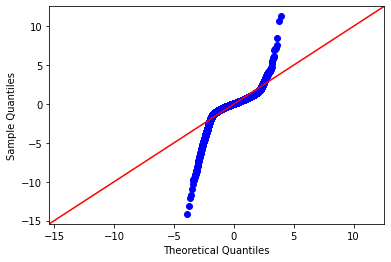

In [53]:
sm.graphics.qqplot(interaction_model.resid, dist=stats.norm, line='45', fit=True)
plt.show()

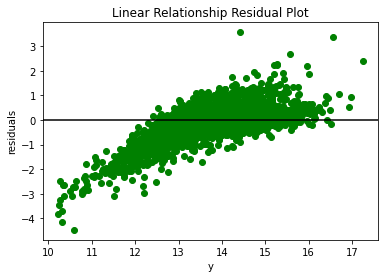

In [54]:
fig, ax = plt.subplots()

ax.scatter(log_y, interaction_model.resid, color="green")
ax.axhline(y=0, color="black")
ax.set_xlabel("y")
ax.set_ylabel("residuals")
ax.set_title("Linear Relationship Residual Plot");

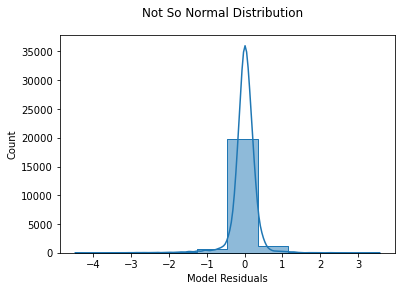

In [55]:
fig, ax = plt.subplots()
sns.histplot(interaction_model.resid, bins=10, element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("Not So Normal Distribution");